# World Bank API

In [ ]:
!pip install requests pandas mathplotlib 

## World Bank API Broad

### Imports

In [4]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

### Drivers

In [5]:
def fetch_world_bank_data(country_code, indicator, start_year, end_year):
    base_url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}"
    }
    response = requests.get(base_url, params=params)
    data = response.json()[1]
    return {item['date']: item['value'] for item in data if item['value'] is not None}

def plot_data(country_name, indicators_data):
    plt.figure(figsize=(12, 6))
    for indicator, data in indicators_data.items():
        if data:
            years = list(data.keys())
            values = list(data.values())
            plt.plot(years, values, marker='o', label=indicator)
    
    plt.title(f"Education Indicators for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



### Example

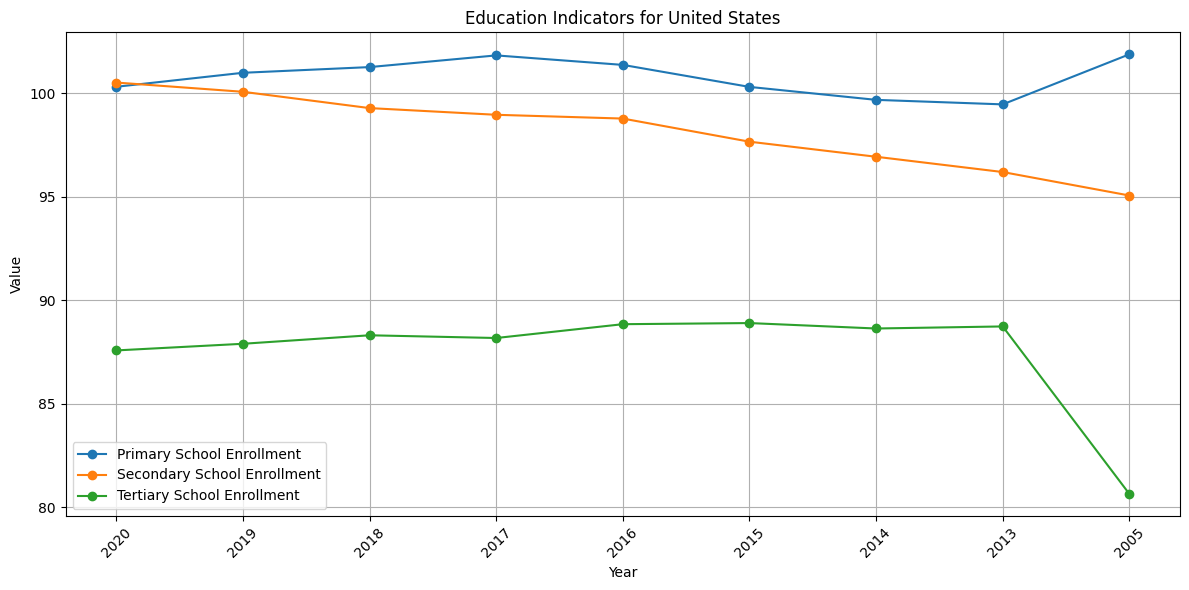

In [6]:
country_code = "USA"  # Change this to the desired country code
country_name = "United States"  # Change this to the corresponding country name
start_year = 2000
end_year = 2020

indicators = {
    "SE.PRM.ENRR": "Primary School Enrollment",
    "SE.SEC.ENRR": "Secondary School Enrollment",
    "SE.TER.ENRR": "Tertiary School Enrollment"
}

indicators_data = {}
for indicator_code, indicator_name in indicators.items():
    data = fetch_world_bank_data(country_code, indicator_code, start_year, end_year)
    if data:
        indicators_data[indicator_name] = data
    else:
        print(f"Failed to fetch data for {indicator_name}")

if indicators_data:
    plot_data(country_name, indicators_data)
else:
    print("No data available to plot")

## World Bank API for World Development Indicators

### Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

### Drivers

In [9]:
def fetch_wdi_metadata():
    url = "http://api.worldbank.org/v2/source/2/indicators"  # 2 is the source ID for World Development Indicators
    params = {
        "format": "json",
        "per_page": 1000  # Adjust if there are more than 1000 indicators
    }
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error fetching metadata: HTTP {response.status_code}")
        return None
    
    try:
        data = response.json()[1]
        df = pd.DataFrame(data)[['id', 'name', 'sourceNote']]
        df = df.rename(columns={'sourceNote': 'description'})  # Rename for clarity
        return df
    except Exception as e:
        print(f"Error processing metadata: {e}")
        return None

def fetch_wdi_data(country_code, indicator, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}"
    }
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error fetching data: HTTP {response.status_code}.")
        return None

    try:
        data = response.json()[1]
        return {item['date']: item['value'] for item in data if item['value'] is not None}
    except Exception as e:
        print(f"Error processing data: {e}")
        return None

def display_indicator_table(df,head_rows=10):
    # Set pandas display options
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    # Display the dataframe
    display(HTML(df.head(head_rows).to_html(index=False)))

def plot_indicators(country_name, indicators_data):
    plt.figure(figsize=(12, 6))
    for indicator, data in indicators_data.items():
        years = list(data.keys())
        values = list(data.values())
        plt.plot(years, values, marker='o', label=indicator)
    
    plt.title(f"World Development Indicators for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Examples

In [10]:
metadata_df = fetch_wdi_metadata()
indicators = 20
if metadata_df is not None:
    print("World Development Indicators:")
    display_indicator_table(metadata_df,indicators)

World Development Indicators:


id,name,description
AG.AGR.TRAC.NO,"Agricultural machinery, tractors",Agricultural machinery refers to the number of wheel and crawler tractors (excluding garden tractors) in use in agriculture at the end of the calendar year specified or during the first quarter of the following year.
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production),"Fertilizer consumption measures the quantity of plant nutrients used per unit of arable land. Fertilizer products cover nitrogenous, potash, and phosphate fertilizers (including ground rock phosphate). Traditional nutrients--animal and plant manures--are not included. For the purpose of data dissemination, FAO has adopted the concept of a calendar year (January to December). Some countries compile fertilizer data on a calendar year basis, while others are on a split-year basis."
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land),"Fertilizer consumption measures the quantity of plant nutrients used per unit of arable land. Fertilizer products cover nitrogenous, potash, and phosphate fertilizers (including ground rock phosphate). Traditional nutrients--animal and plant manures--are not included. For the purpose of data dissemination, FAO has adopted the concept of a calendar year (January to December). Some countries compile fertilizer data on a calendar year basis, while others are on a split-year basis. Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded."
AG.LND.AGRI.K2,Agricultural land (sq. km),"Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded. Land under permanent crops is land cultivated with crops that occupy the land for long periods and need not be replanted after each harvest, such as cocoa, coffee, and rubber. This category includes land under flowering shrubs, fruit trees, nut trees, and vines, but excludes land under trees grown for wood or timber. Permanent pasture is land used for five or more years for forage, including natural and cultivated crops."
AG.LND.AGRI.ZS,Agricultural land (% of land area),"Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded. Land under permanent crops is land cultivated with crops that occupy the land for long periods and need not be replanted after each harvest, such as cocoa, coffee, and rubber. This category includes land under flowering shrubs, fruit trees, nut trees, and vines, but excludes land under trees grown for wood or timber. Permanent pasture is land used for five or more years for forage, including natural and cultivated crops."
AG.LND.ARBL.HA,Arable land (hectares),"Arable land (in hectares) includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded."
AG.LND.ARBL.HA.PC,Arable land (hectares per person),"Arable land (hectares per person) includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once

In [11]:
# User input for plotting
country_code = "PAK"
country_name = "Pakistan"
start_year = 2000
end_year = 2020

num_indicators = int(input("How many indicators do you want to plot? "))
indicators = {}
for i in range(num_indicators):
    indicator_id = input(f"Enter indicator {i+1} ID: ")
    indicator_name = input(f"Enter indicator {i+1} name: ")
    indicators[indicator_id] = indicator_name

In [12]:
for indicator_id, indicator_name in indicators.items():
    data = fetch_wdi_data(country_code, indicator_id, start_year, end_year)
    if data:
        indicators_data[indicator_name] = data
    else:
        print(f"Failed to fetch data for {indicator_name}")

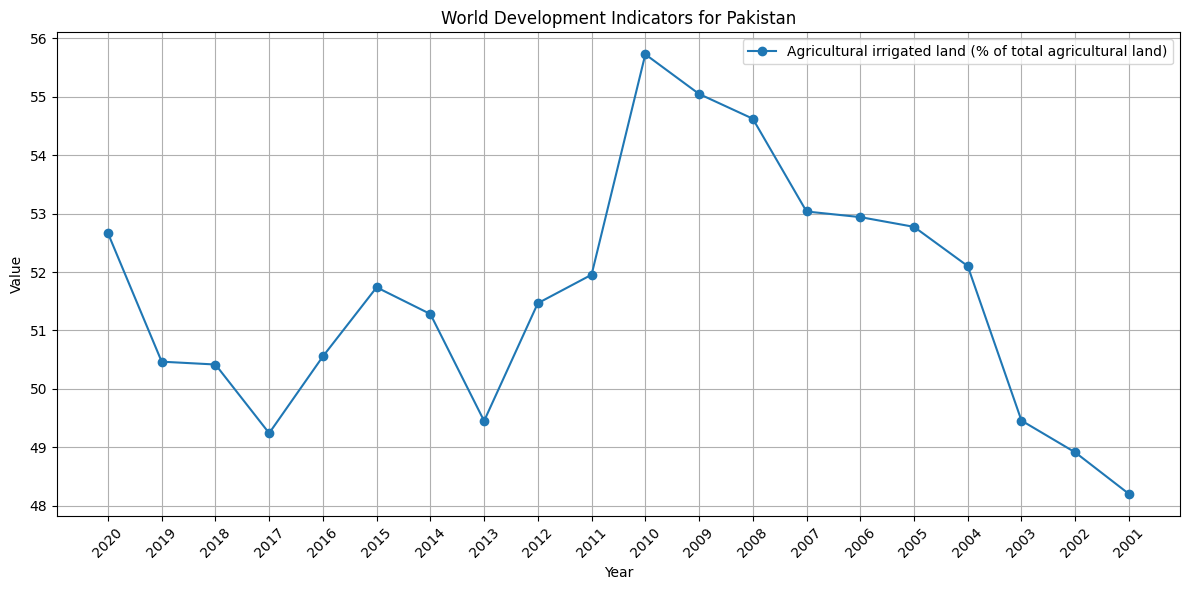

In [13]:
# Fetch and plot data
indicators_data = {}
for indicator_id, indicator_name in indicators.items():
    data = fetch_wdi_data(country_code, indicator_id, start_year, end_year)
    if data:
        indicators_data[indicator_name] = data
    else:
        print(f"Failed to fetch data for {indicator_name}")

if indicators_data:
    plot_indicators(country_name, indicators_data)
else:
    print("No data available to plot")